In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fec = pd.read_csv('datasets/fec/P00000001-ALL.csv', low_memory=False)

In [3]:
fec.shape

(1001731, 16)

In [4]:
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [5]:
fec.iloc[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                        50.0
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

In [6]:
# all candidates
unique_cands = fec['cand_nm'].unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [8]:
parties = {"Bachmann, Michelle": "Republican",
           "Cain, Herman": "Republican",
           "Gingrich, Newt": "Republican",
           "Huntsman, Jon": "Republican",
           "Johnson, Gary Earl": "Republican",
           "McCotter, Thaddeus G": "Republican",
           "Obama, Barack": "Democrat",
           "Paul, Ron": "Republican",
           "Pawlenty, Timothy": "Republican",
           "Perry, Rick": "Republican",
           "Roemer, Charles E. 'Buddy' III": "Republican",
           "Romney, Mitt": "Republican",
           "Santorum, Rick": "Republican"}

In [9]:
fec['party'] = fec['cand_nm'].map(parties)

In [10]:
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [11]:
fec['contb_receipt_amt'].describe()

count    1.001731e+06
mean     2.982352e+02
std      3.749667e+03
min     -3.080000e+04
25%      3.500000e+01
50%      1.000000e+02
75%      2.500000e+02
max      2.014491e+06
Name: contb_receipt_amt, dtype: float64

In [12]:
(fec['contb_receipt_amt'] > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [13]:
fec = fec[fec['contb_receipt_amt'] > 0]

In [14]:
# two main candidates
fec_bomr = fec[fec['cand_nm'].isin(['Obama, Barack', 'Romney, Mitt'])]
fec_bomr.shape

(694282, 17)

In [15]:
# Donation Statistics by Occupation and Employer
fec['contbr_occupation'].value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

In [16]:
occ_mapping = {
   "INFORMATION REQUESTED PER BEST EFFORTS" : "NOT PROVIDED",
   "INFORMATION REQUESTED" : "NOT PROVIDED",
   "INFORMATION REQUESTED (BEST EFFORTS)" : "NOT PROVIDED",
   "C.E.O.": "CEO"
}

fec['contbr_occupation'] = fec['contbr_occupation'].map(lambda x: occ_mapping.get(x, x))

In [18]:
emp_mapping = {
   "INFORMATION REQUESTED PER BEST EFFORTS" : "NOT PROVIDED",
   "INFORMATION REQUESTED" : "NOT PROVIDED",
   "SELF" : "SELF-EMPLOYED",
   "SELF EMPLOYED" : "SELF-EMPLOYED",
}
fec['contbr_employer'] = fec['contbr_employer'].map(lambda x: emp_mapping.get(x, x))

In [19]:
# 不同职业给两党的捐赠情况
by_occupation = fec.pivot_table(values='contb_receipt_amt', index='contbr_occupation', columns='party', aggfunc='sum')


In [23]:
# >2 million的职业类别
over_2m = by_occupation[by_occupation.sum(axis=1) > 2_000_000]
over_2m

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7477194.43
CEO,2074974.79,4211040.52
CONSULTANT,2459912.71,2544725.45
ENGINEER,951525.55,1818373.70
EXECUTIVE,1355161.05,4138850.09
HOMEMAKER,4248875.80,13634275.78
INVESTOR,884133.00,2431768.92
LAWYER,3160478.87,391224.32
MANAGER,762883.22,1444532.37


<Axes: ylabel='contbr_occupation'>

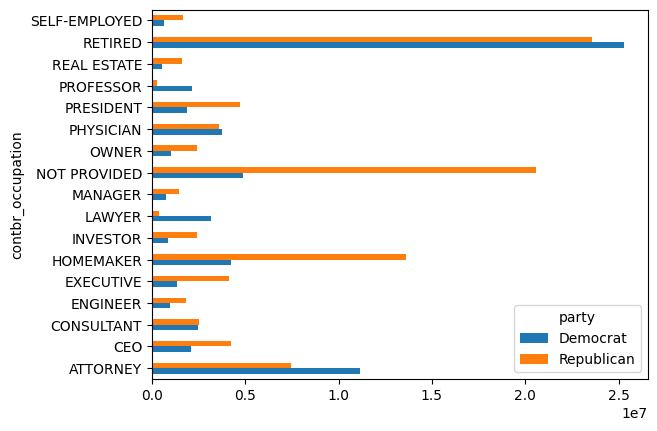

In [24]:
over_2m.plot.barh()

In [26]:
# 两位候选人的主要竞选资金来源-不同职业
def get_top_amounts(g, col, n=5):
    # 
    total_amounts = g.groupby(col)['contb_receipt_amt'].sum()
    return total_amounts.nlargest(n)

# two main candidates
fec_bomr = fec[fec['cand_nm'].isin(['Obama, Barack', 'Romney, Mitt'])]
g = fec_bomr.groupby('cand_nm')
g.apply(get_top_amounts, 'contbr_occupation')

cand_nm        contbr_occupation
Obama, Barack  RETIRED              25305116.38
               ATTORNEY             11141982.97
               NOT PROVIDED          4866973.96
               HOMEMAKER             4248875.80
               PHYSICIAN             3735124.94
Romney, Mitt   RETIRED              11508473.59
               NOT PROVIDED         11396894.84
               HOMEMAKER             8147446.22
               ATTORNEY              5364718.82
               PRESIDENT             2491244.89
Name: contb_receipt_amt, dtype: float64

<Axes: ylabel='contbr_occupation'>

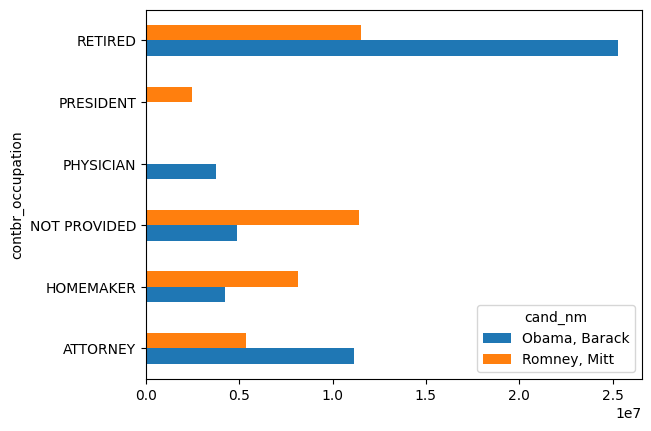

In [29]:
g.apply(get_top_amounts, 'contbr_occupation').unstack(0).plot.barh()

<Axes: ylabel='contbr_employer'>

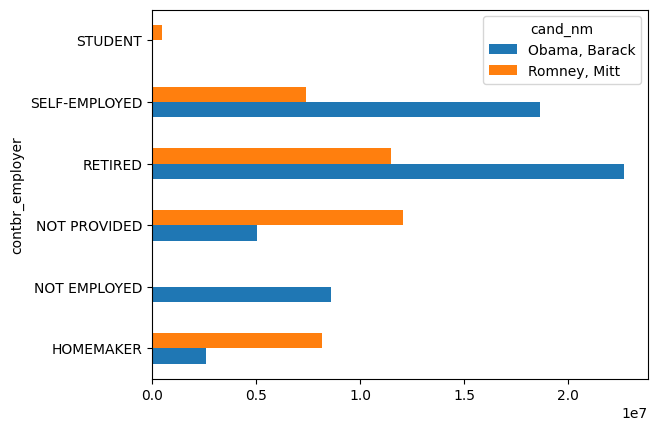

In [30]:
g.apply(get_top_amounts, 'contbr_employer').unstack(0).plot.barh()

In [34]:
# Bucketing Donation Amounts

bins = np.logspace(0, 7, num=8, base=10)
bins

array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07])

In [35]:
bins = np.array([0, 1, 10, 100, 1000, 10000, 100_000, 1_000_000, 10_000_000])
bins

array([       0,        1,       10,      100,     1000,    10000,
         100000,  1000000, 10000000])

In [36]:
labels = pd.cut(fec_bomr['contb_receipt_amt'], bins)
labels

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
701381      (10, 100]
701382    (100, 1000]
701383        (1, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (8, interval[int64, right]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

In [37]:
g = fec_bomr.groupby(['cand_nm', labels])

In [39]:
g.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


<Axes: ylabel='contb_receipt_amt'>

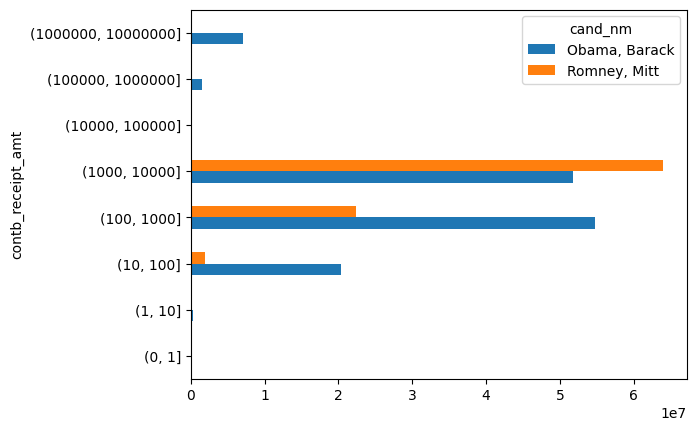

In [44]:
g['contb_receipt_amt'].sum().unstack(0).plot.barh()

In [41]:
fec_bomr.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Obama, Barack    1.358774e+08
Romney, Mitt     8.833591e+07
Name: contb_receipt_amt, dtype: float64

In [45]:
bucket_sum = g['contb_receipt_amt'].sum().unstack(0)
bucket_sum

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798531.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,0.00
"(1000000, 10000000]",7148839.76,0.00


In [46]:
'''
Author: wujianliang
Date: 2024-05-07 09:12:29
LastEditTime: 2024-05-07 10:34:12
LastEditors: wujianliang
Description: 
'''
normed_sum = bucket_sum.div(bucket_sum.sum(axis=1), axis=0)
normed_sum

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,0.000000
"(1000000, 10000000]",1.000000,0.000000


<Axes: ylabel='contb_receipt_amt'>

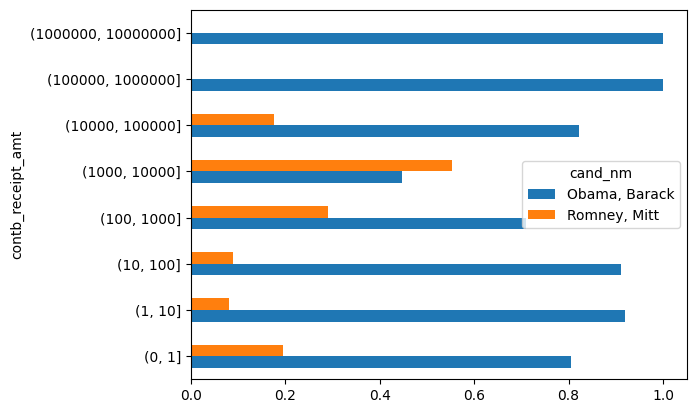

In [47]:
normed_sum.plot.barh()

In [59]:
# Donation statistic by state
g = fec_bomr.groupby(['cand_nm', 'contbr_st'])
totals = g['contb_receipt_amt'].sum()

In [60]:
totals = totals.unstack(0)
totals

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AA,56405.00,135.00
AB,2048.00,NaN
AE,42973.75,5680.00
AK,281840.15,86204.24
AL,543123.48,527303.51
...,...,...
WI,1130155.46,270316.32
WV,169154.47,126725.12
WY,194046.74,252595.84


In [61]:
totals  = totals[totals.sum(axis=1) > 5_000_000]
totals

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
CA,23824984.24,11237636.60
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
FL,7318178.58,8338458.81
IL,16443895.84,3628571.53
MA,6649015.25,4710542.30
MD,4832663.93,1633690.40
MI,2570307.25,2448109.87
NJ,3203257.93,3333320.20


In [62]:
percent = totals.div(totals.sum(axis=1), axis=0)
percent

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
CA,0.679498,0.320502
CT,0.371476,0.628524
DC,0.810113,0.189887
FL,0.467417,0.532583
IL,0.819226,0.180774
MA,0.585323,0.414677
MD,0.747355,0.252645
MI,0.512175,0.487825
NJ,0.490051,0.509949


<Axes: ylabel='contbr_st'>

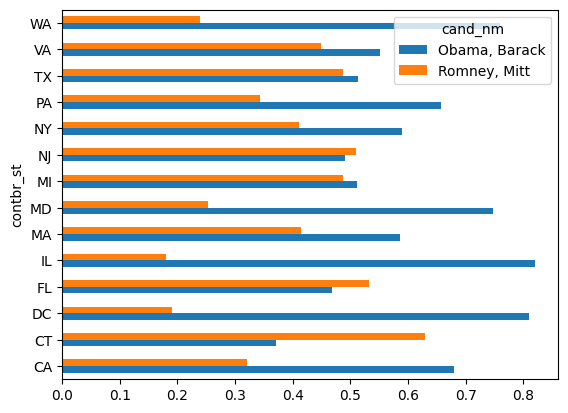

In [63]:
percent.plot.barh()